# 4 Exploring Canopy Water Content (CWC) and Land Surface Temperature (LST) across Vegetation Types in the Jack and Laura Dangermond Preserve

> This notebook is part of a numbered series (01-05) that focuses specifically on using EMIT and ECOSTRESS Data together to prepare for future SBG research.

**Authors**  
Christiana Ade<sup>1</sup> and Marie Johnson<sup>1,2</sup>  
1. Jet Propulsion Laboratory, California Institute of Technology  
2. University of Montana

**Summary**  
In this notebook, we will examine how Canopy Water Content (CWC) derived from EMIT data and Land Surface Temperature (LST) derived from ECOSTRESS change across three different vegetation types and dates in the Jack and Laura Dangermond preserve.

>Note in previous notebooks, we referenced the CWC product as Equivalent Water Thickness (EWT) because water signal can still be retrieved from non-vegetated surfaces. But, here we will be investigating vegetated surfaces and will reference it as CWC.*

**Learning Objectives**  
- Use product time series related to a real life scenario concerning invasive species in nature preserves. 

**Requirements**  
 - [NASA Earthdata Account](https://urs.earthdata.nasa.gov/home)  
 - *No Python setup requirements if connected to the workshop cloud instance!*  
 - **Local Only** Set up Python Environment - See **setup_instructions.md** in the `/setup/` folder to set up a local compatible Python environment  
 - Downloaded necessary files. This is done at the end of the [01_Finding_Concurrent_Data](01_Finding_Concurrent_Data.ipynb) notebook.

**Background**  

In 2017, The Nature Conservancy (TNC) acquired the preserve through a generous donation from Jack and Laura Dangermond. The preserve is 24,460 acres of a former private ranch situated at Point Conception, California. Point conception represents the boundary between Northern and Southern California, which separates terrestrial, marine, and coastal ecoregions. This is one of only a few areas globally where the boundary between marine and terrestrial ecosystems exist together. The preserve is one of the last "wild coast" areas in Southern California and it has some of the highest biodiversity globally. The Dangermond Preserve offers a unique opportunity to study the impacts of global change; sea level rise, the intensification of wildfire and drought providing a natural laboratory.

The preserve is naturally composed of oak tree forests and native grasslands; however, in recent years it faces several invasion issues from non-native grasses and iceplant (*Carpobrotus spp.*). The currently mapped invasive plant species at the Preserve include non-native grasslands, iceplant  mats, and stands of black mustard (*Brassica nigra*), poison hemlock (*Conium maculatum*), thistles, and fennel (*Foeniculum vulgare*). Iceplant is one of the priority species listed under the preserve's invasive species management plan.

<figure align="center">
  <img src="../img/dangermond_use_case/ice_plant_close_up.jpg" width="200" height="200"/>
  <img src="../img/dangermond_use_case/ice_plant_flower.jpg" width="200" height="200"/>
    <img src="../img/dangermond_use_case/iceplant_beach.jpg" width="200" height="200"/>
    <figcaption>Figure 1. Iceplants along California's coastline.</figcaption> 
</figure>
Iceplant is an invasive species native to South Africa that was introduced to California in the 1500s. Because of its ability to stabilize soil in the 1950’s, the Department of Transportation used iceplant to prevent erosion on roadsides. This practice lasted for 20 years before it was discontinued, however, many homeowners still use iceplant for landscaping today. Although iceplant can help prevent coastal erosion, it threatens coastal biodiversity. Iceplant takes up a large amount of soil moisture, thereby taking moisture away from other species. It can also inhibit the establishment of native grass species as a result of a high nitrate accumulation in iceplant soils. Current management efforts to eradicate iceplant at the Dangermond Preserve include cattle grazing. TNC is interested in utilizing enhanced remote sensing techniques to understand iceplant characteristics and detect iceplant locations. 

<figure align="center">
  <img src="../img/dangermond_use_case/invasive_species_map_TNC.png" width="300">
  <figcaption>Figure 2. Invasive species locations at the preserve in 2021.</figcaption>  
</figure>
                                                        
**Exercise information**

The cropped EMIT and ECOSTRESS imagery used in this notebook were created using code from previous tutorial notebooks. We have simply cropped this imagery to the Dangermond boundaries and saved them to the `data` directory. As a reference, the tutorial code needed crop EMIT and ECOSTRESS products is in `02_Working_with_EMIT_Reflectance_and_ECOSTRESS_LST.ipynb` in sections *2.2.3 Cropping EMIT data to a Region of Interest*, *2.2.4 Write an output*, *2.3.2 Cropping ECOSTRESS Data*, and *2.3.3 Writing Outputs*.

**Tutorial references**  
01_Finding_Concurrent_Data.ipynb 
- In this notebook we learned how to use earthaccess to find concurrent EMIT and ECOSTRESS data
- We also learned how to export a list of files and download them programmatically.

02_Working_with_EMIT_Reflectance_and_ECOSTRESS_LST.ipynb
- How to open and work with EMIT L2A Reflectance and ECOSTRESS L2T LSTE data
- How to apply a quality mask to EMIT datasets
- How to reproject and regrid data
- How to crop EMIT and ECOSTRESS data

03_EMIT_CWC_from_Reflectance.ipynb
- Calculate the EWT of a single pixel 
- Calculate the EWT of a ROI


**Required datasets**  
1. Image datasets:
   This imagery has already been processed and uploaded to the `data` directory using code from previous notebooks. We will use three dates in 2023 to represent different seasons: April 1st, June 29th, and September 23rd. 

- EMIT Canopy Water Content
    - EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif
    - EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif
    - EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif

- ECOSTRESS Land Surface Temperature
    - ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif
    - ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif
    - ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif
    

2.  Vector datasets: 
    - *veg_plots_outline.geojson* : This file includes polygons of delineated vegetation plots of iceplant, non-native grassland, and coastal live oak polygons. This file was created specifically for this tutorial and the polygons were delineated using vegetation maps of Dangermond and field data collected during the [SHIFT campaign.](https://climate.nasa.gov/news/3157/california-field-campaign-is-helping-scientists-protect-diverse-ecosystems/)

**Tutorial Outline**  

4.1 View the CWC and LST images along with the vegetation class polygons  
4.2 Extract the CWC Raster Values  
4.3 Make a boxplot of CWC Extracted Values  
4.4 Extract and create box plot of LST images  
4.5 Investigate and discuss the differences between vegetation classes and dates for both CWC and LST  
4.6 Interactive playground! - Create your own polygons for extraction  
    
**References** 
* Bossard, C. C., Randall, J. M., & Hoshovsky, M. C. (Eds.). (2000). Invasive Plants of California's Wildlands. University of California Press.
* Butterfield, H.S., M. Reynolds, M.G. Gleason, M. Merrifield, B.S. Cohen, W.N. Heady, D. Cameron, T. Rick, E. Inlander, M. Katkowski, L. Riege, J. Knapp, S. Gennet, G. Gorga, K. Lin, K. Easterday, B. Leahy and M. Bell. 2019. Jack and Laura Dangermond Preserve Integrated Resources Management Plan. The Nature Conservancy. 112 pages.  
* Iceplant images https://centralcoastparks.org/ice-plant-the-iconic-but-destructive-piece-of-california-coastal-landscape/
https://sanctuaries.noaa.gov/news/feb15/invasive-species.html

## Setup

In [1]:
# Import required packages 
import re
import os
import glob
import warnings

# Some cells may generate warnings that we can ignore. Comment below lines to see.
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from osgeo import gdal
import rasterio as rio
import rioxarray as rxr
from matplotlib import pyplot as plt
import hvplot.xarray
import hvplot.pandas
import holoviews as hv
import geopandas as gp
import panel as pn
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 View the vegetation polygons and the EMIT CWC products

Let's make a list called `cwc_list` of all the previously cropped EMIT CWC images by searching for tifs in our image directory `cropped/dangermond/ewt/`. 

In [2]:
# data directory - location of all images cropped to dangermond. Includes subfolders for ewt and lst. 
data_dir = "../data/"

# list all files in the ewt sub-directory of the data_dir path that end in tif
cwc_list = glob.glob(os.path.join(data_dir, "cwc", "*.tif"))
cwc_list

['../data/cwc/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230219T202939_2305013_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230422T195924_2311213_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230405T190311_2309513_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20231014T224006_2328715_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230219T202951_2305013_003_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230219T202939_2305013_002_dangermond_cwc_merged.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif']

`cwc_list` is a list of nine previously processed EMIT scenes over Dangermond. However, several of those scenes do not capture the full preserve. 
In these first parts of the notebook, we fill focus on three dates by making a filtered list of the cwc files called `fil_cwc_list`. We will use these dates to subset
- Spring: 2023-04-01
- Summer: 2023-06-29
- Fall:   2023-09-23

In [3]:
# the date and time codes strings we want to select from our larger cwc_list
cwc_dates = ['20230401T203751', '20230629T170449', '20230923T232101']

# Written as a loop so the files appear chronologically 
fil_cwc_list = [] # empty list

for date in cwc_dates:
    # filter for appropriate dates and then add back
    fil_cwc_list.extend([file for file in cwc_list if date in file])
fil_cwc_list

['../data/cwc/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif']

### Let's visualize the three CWC scenes 

Next we will write a loop to visualize the change in CWC through time. 


In [4]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each CWC file and create a plot
for file in fil_cwc_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # extract the date string from the file file name
    ras_date =  re.search(r"\d{8}", file).group()
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='blues',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=2, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')

<div class="alert alert-success"> The southwest corner of Dangermond seems to have a much higher CWC than other regions. From Figure 2, we can see that this is likely a very large iceplant patch. What other patterns do you see? </div>

### Let's Load the Vegetation Polygons

Here we will load previously delineated vegetation plots of iceplant, coastal live oak and non-native grasslands from the `veg_plots_outline.geojson` as the variable `veg_poly`. These plots come from a combination of field data and previous maps created for Dangermond preserve management. 

<figure align="center">
  <img src="../img/dangermond_use_case/veg_plot_types.png" width="700" height="200">
  <figcaption>Figure 3. Examples of the different vegetation types in the veg_plots_outline.geojson.</figcaption>  
</figure>


In [5]:
# Read in veg polygons
veg_poly = gp.read_file("../data/veg_plots_outline.geojson")

In [6]:
# Let's load in the September image for the plot visualization 
cw3 = rxr.open_rasterio(fil_cwc_list[2]).squeeze('band',drop=True)

Let's visualize this polygon dataset on top of the September CWC scene. On the left side, `plot_1` shows the vegetation plots in red overlayed on the CWC scene. On the right side `plot_2` has the polygons colored by vegetation class. 


In [7]:
# Plot 1 with CWC September for reference 
plot_1 = cw3.hvplot.image(x='x',y='y',geo=True, cmap='blues',tiles='ESRI',
                          title=f"{cw3.long_name} ({cw3.units})",
                          xlabel='Longitude',ylabel='Latitude', frame_width=300,
                          frame_height=300, fontscale=1, alpha = 0.7) * veg_poly.to_crs('EPSG:3857').hvplot(c='red',alpha=1)


# Plot 2 with vegetation plot types varying by color
plot_2 = veg_poly.hvplot.polygons(geo=True, c='Class', hover_cols='all', 
                                         xlabel='Longitude',ylabel='Latitude', frame_width=300,
                                         frame_height=300, fontscale=1, title='Dangermond Vegetation Plots')

plot_1 + plot_2


:Layout
   .Overlay.I  :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Image.I    :Image   [x,y]   (value)
      .Polygons.I :Polygons   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (Class,index,id)

To zoom in click the `box` or `wheel` zoom icon.

### 4.2 Extract CWC Pixel Values from Vegetation Polygons

In this section, we will use a previously written extract function called `extract_raster_values` from the accompanying script `jlpd_ras_funcs.py`. This script includes all the more advanced functions written for this notebook which is why we are using `import *.`. Several of the other will be referenced later in the interactive portion of the notebook.

In [8]:
# This is one way to load functions written from another script
from modules.jldp_ras_funcs import *

Here we will create a loop to extract the raster values from every pixel in each polygon of the `veg_plots_outline.shp` file for the spring, summer, and fall `cwc_dates`. The final output dataframe file will be called `subset_df`.

In [9]:
# Create an empty list to store extracted values in
ex_df = [] 

# Loop through each raster in fil_cwc_list
for r in fil_cwc_list:
    # Open the raster 
    ras = rxr.open_rasterio(r).squeeze('band', drop=True)
        
    # Extract raster values
    ex_ras = extract_raster_values(ras, veg_poly)
    
    # Extract the image date from the raster itself and format correctly
    date_object = datetime.strptime(ras.attrs['time_coverage_end'], "%Y-%m-%dT%H:%M:%S%z")
    date_only = date_object.date()
    
    # Add date to new column in data frame
    ex_ras['rasDate'] = date_only
    
    # Append to list
    ex_df.append(ex_ras)
    
# concatenate  all list entries into a dataframe
ex_cwc = pd.concat(ex_df).reset_index(drop=True)
 # Rename column value to CWC
ex_cwc.rename(columns={'value': 'CWC'}, inplace=True)
# Replace -9999 with NA in the CWC column
ex_cwc['CWC'].replace(-9999, np.nan, inplace=True) 
# Remove rows with NA values in the CWC column
ex_cwc = ex_cwc.dropna(subset=['CWC']) 

In [10]:
# Preview data
ex_cwc.head()

x          y  spatial_ref       CWC  \
0 -120.461840  34.452859            0  0.887800   
1 -120.461840  34.452317            0  0.887800   
2 -120.461840  34.451775            0  0.706839   
3 -120.461840  34.451233            0  0.732946   
4 -120.461297  34.452859            0  1.071603   

                              cell_number  id      Class  \
0   34.45285946671181_-120.46183955389516   0  ice_plant   
1   34.45231723419155_-120.46183955389516   0  ice_plant   
2  34.451775001671294_-120.46183955389516   0  ice_plant   
3  34.451232769151034_-120.46183955389516   0  ice_plant   
4    34.45285946671181_-120.4612973213749   0  ice_plant   

                                            geometry     rasDate  
0  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
1  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
2  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
3  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01  
4  MULTIPOLYGON (((-120.46214771722677 34.4533973...  2023-04-01

Let's make a quick boxplot of our extracted values across seasons just to check that our extract function worked. 

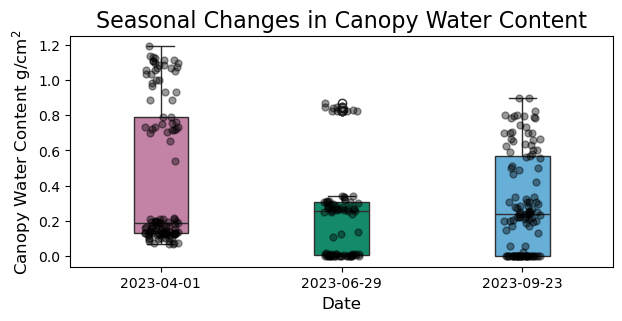

In [11]:
fig, ax = plt.subplots(figsize=(7,3))
# add boxplot 
b = sns.boxplot(x = 'rasDate', 
                y = 'CWC', 
                data = ex_cwc,
                ax = ax,
               width = 0.3,
               palette = {"#56B4E9", "#009E73", "#CC79A7"}) # Create color palette
b.set_ylabel("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 12)
b.set_xlabel("Date", fontsize = 12)
b.set_title("Seasonal Changes in Canopy Water Content", fontsize = 16)

# overlay points for all values
b = sns.stripplot(data = ex_cwc,
                       x = 'rasDate', 
                       y = 'CWC', 
                       ax = ax,
                      color = "black", # Colours the dots
                      linewidth = 1,     # Dot outline width
                      alpha = 0.4)       # Makes them transparent

## 4.3 Generate Boxplots of CWC Across Vegetation types

Great! We managed to extract all the pixel values, but we are more interested in investigating the differences across **vegetation plot types**. Here, we separate the above plot into three faceted plots, one for each vegetation type. The final plot is called `p_class`. 


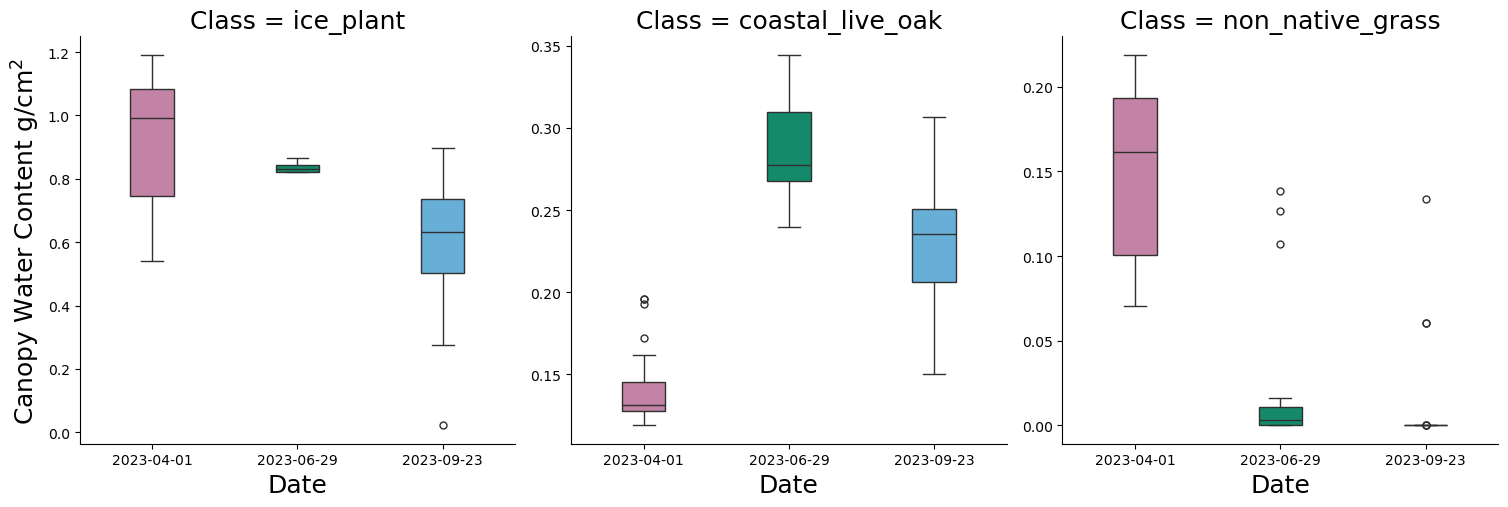

In [12]:
p_class = sns.catplot(
    x='rasDate', 
    y='CWC', 
    col='Class',  # This will create a separate plot for each unique value in the 'Class' column
    data=ex_cwc, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)

# set titles and x and y labels
p_class.set_titles(size = 18)
p_class.set_xlabels("Date", fontsize = 18)
p_class.set_ylabels("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 18)

<div class="alert alert-success"> What changes in CWC do you see across vegetation types and dates?</div>

## 4.4 Extract LST values and create corresponding boxplot

We are also interested in looking at changes in LST across time, so let's repeat a similar process to extract LST values by vegetation type. The final extracted data frame is called `final_df_lst`

Create a list of all LST files called `lst_list`.

In [13]:
# list all files in the ewt sub-directory of the data_dir path that end in tif
lst_list = glob.glob(os.path.join(data_dir, "lst", "*.tif"))
lst_list

['../data/lst/ECOv002_L2T_LSTE_26921_001_10SGD_20230405T190258_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_29901_007_10SGD_20231014T223936_0711_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_26223_012_10SGD_20230219T202943_0710_01_LST_dangermond.tif']

Create a subset of list of LST files using datetimes that are concurrent with EMIT acquisitions. The list is called `fil_lst_list`.

In [14]:
# the date and time codes strings we want to select from our larger lst_list
lst_dates = ['20230401T203733', '20230629T170416', '20230923T232104']

# #loop so that the files appear chronologically like our lst_date list
fil_lst_list = [] # empty list
for date in lst_dates:
    # filter for appropriate dates and then add back
    fil_lst_list.extend([file for file in lst_list if date in file])
fil_lst_list

['../data/lst/ECOv002_L2T_LSTE_26860_001_10SGD_20230401T203733_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_28238_012_10SGD_20230629T170416_0710_01_LST_dangermond.tif',
 '../data/lst/ECOv002_L2T_LSTE_29576_005_10SGD_20230923T232104_0710_01_LST_dangermond.tif']

### Let's visualize all of our LST scenes.

In [15]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each LST file and create a plot
for file in fil_lst_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # Unlike EMIT rasters, extract date from filename using regex since it's not in metadata.
    ras_date =  re.search(r"\d{8}", file).group() # search for groups of 8 digits
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()
 
    # Convert Kelvin to Celsius
    ras -= 273.15  
    
    # Add attributes for plotting
    long_name_value = "Land Surface Temperature"
    ras.attrs['long_name'] = long_name_value
    units_value = "°C"  # Change the units to Celsius
    ras.attrs['units'] = units_value
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='reds',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=2, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')

### Similar to before let's extract all our raster values

In [16]:
# create an empty list
ex_df_lst = []

# loop through each raster in fil_lst_list
for r in fil_lst_list:
    # extract values 
    ras = rxr.open_rasterio(r).squeeze('band',drop=True)
    
    # Convert from K to C
    ras -= 273.15  
    ex_ras = extract_raster_values(ras, veg_poly)
    
    # add date to the dataframe
    rDate =  re.search(r"\d{8}", r).group()
    date_object = datetime.strptime(rDate, "%Y%m%d")
    date_only = date_object.date()#.strftime("%Y-%m-%d")
    
    # add column 
    ex_ras['rasDate'] = date_only
    # add back to data frame with all values
    ex_df_lst.append(ex_ras)

# concatenate all extracts 
final_df_lst = pd.concat(ex_df_lst).reset_index(drop=True)
final_df_lst.rename(columns = {'value':'LST'}, inplace = True) # Rename values column to LST
final_df_lst = final_df_lst[final_df_lst['LST'] > 0 ] # Removes any value less than 0

In [17]:
# preview data
#final_df_lst.head()

Let's take these values and make a box plot similar to before. 

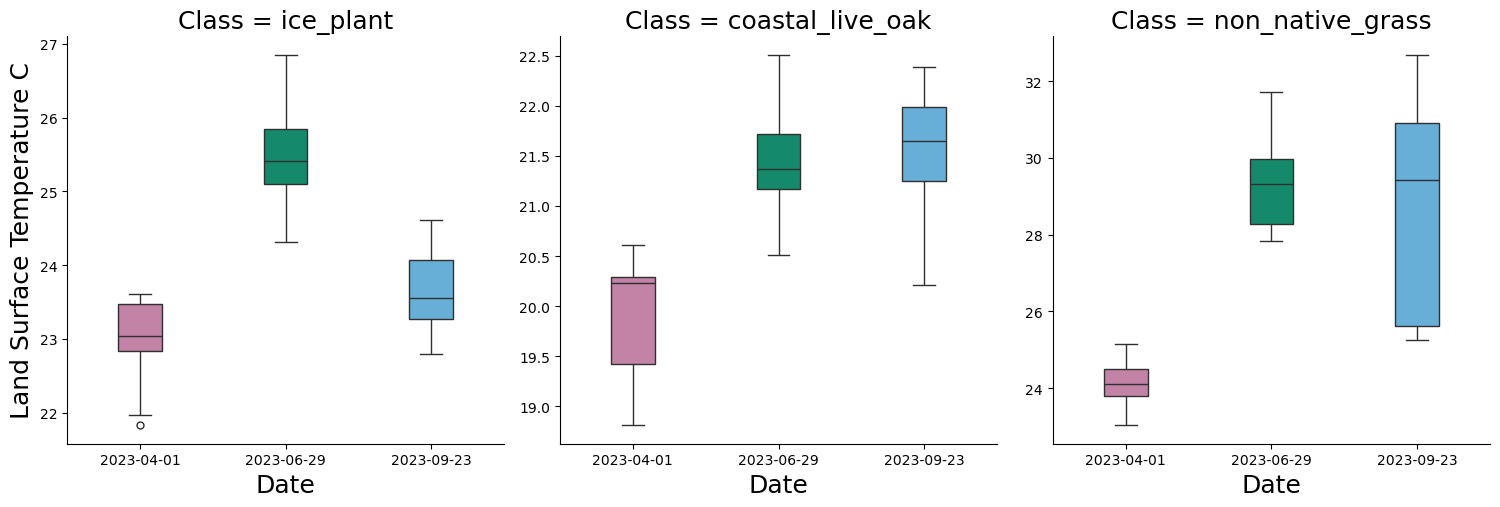

In [18]:
p_class_lst = sns.catplot(
    x='rasDate', 
    y='LST', 
    col='Class',  # This will create a separate plot for each unique value in the 'Class' column
    data=final_df_lst, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)
p_class_lst.set_titles(size = 18)
p_class_lst.set_xlabels("Date", fontsize = 18)
p_class_lst.set_ylabels("Land Surface Temperature C", fontsize = 18)

<div class="alert alert-success"> What changes in LST do you see across vegetation types and dates?</div>

## 4.5 Look at CWC and LST together

Often times we want to visualize two variables together, so let's look at LST and CWC side by side.

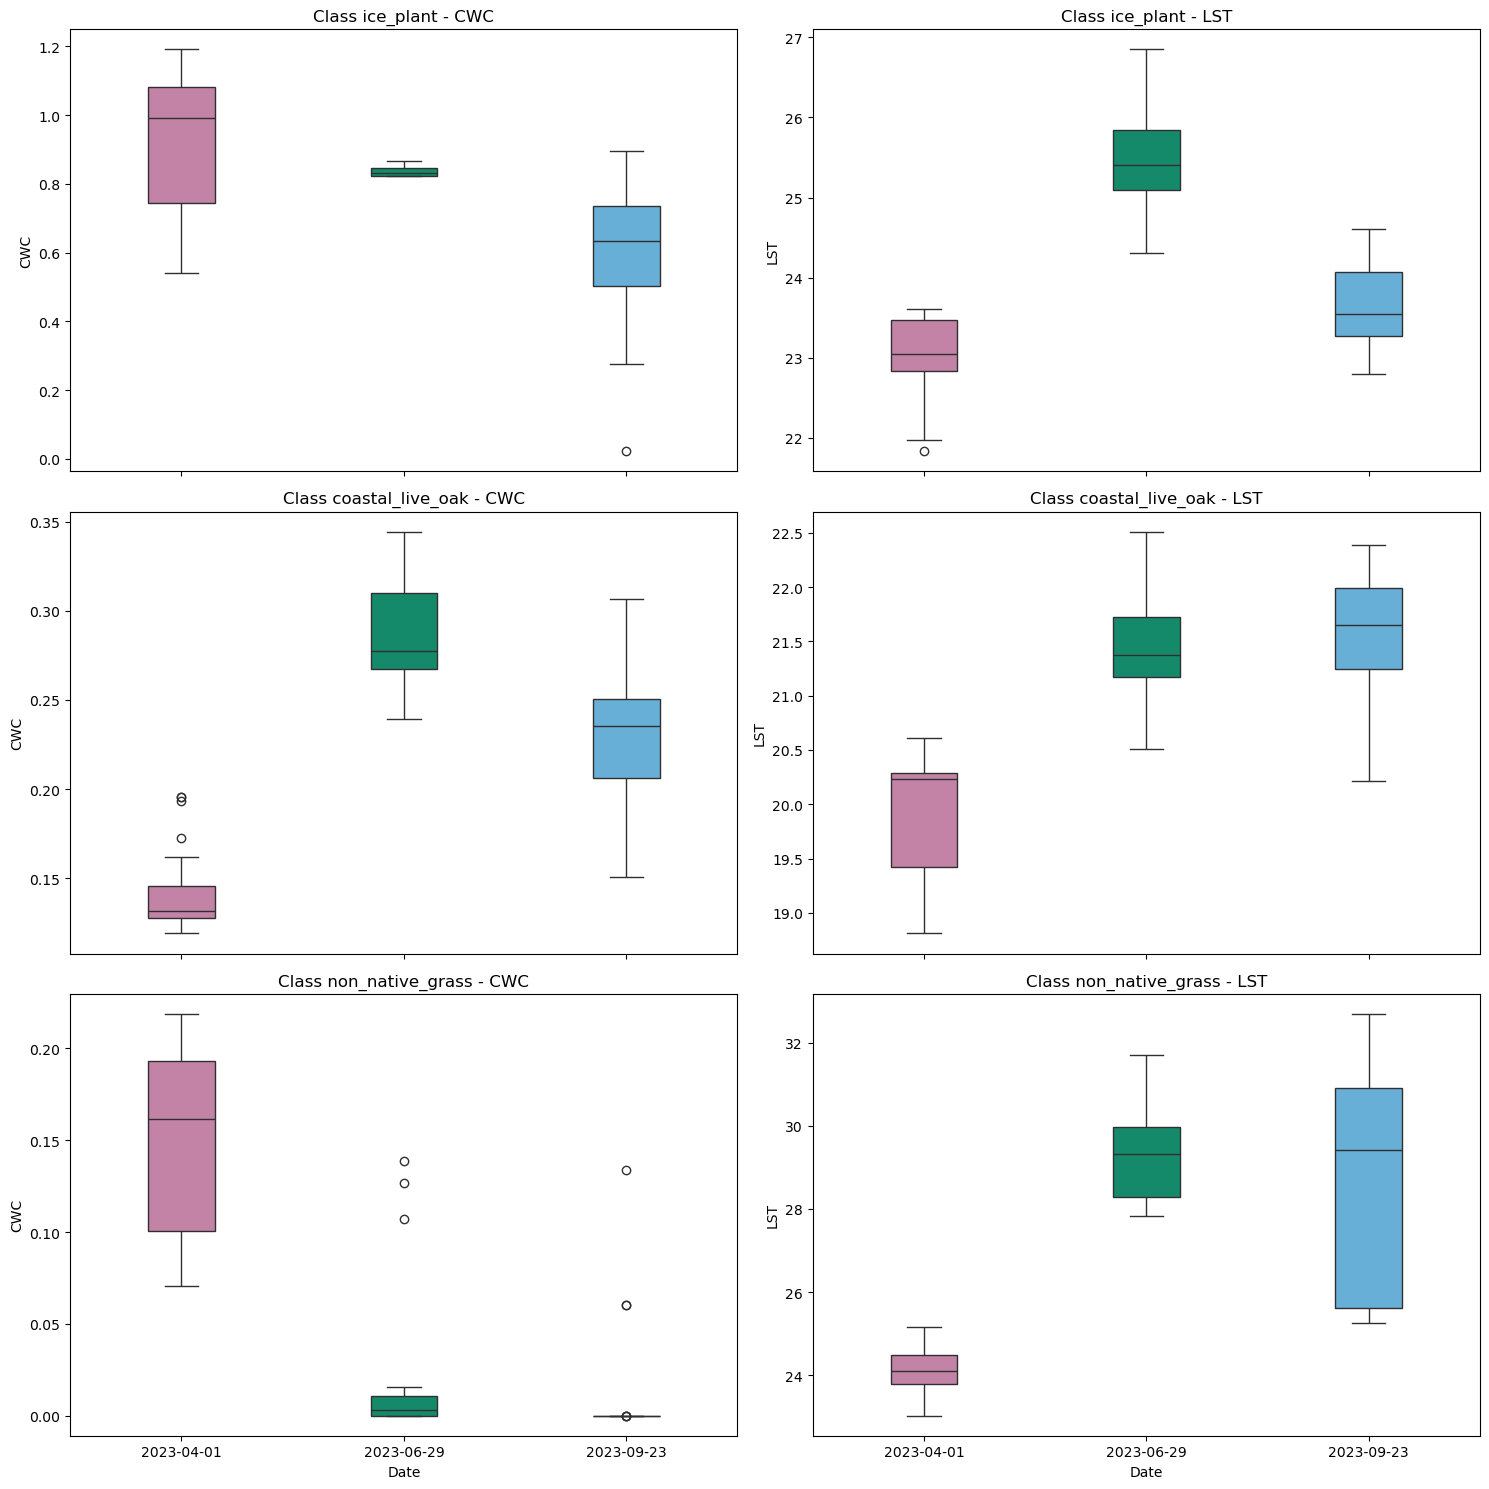

In [19]:
# Generate subplots with boxplots for different vegetation classes comparing CWC and LST
n_classes = ex_cwc['Class'].nunique()
fig, axes = plt.subplots(n_classes, 2, figsize=(15, 5 * n_classes), sharex='col')

# Iterate over each class and plot
for i, class_name in enumerate(ex_cwc['Class'].unique()):
    # Filter data for each class
    class_subset = ex_cwc[ex_cwc['Class'] == class_name]
    class_lst_subset = final_df_lst[final_df_lst['Class'] == class_name]

    # Create boxplot for CWC on the first column
    sns.boxplot(
        x='rasDate', 
        y='CWC', 
        data=class_subset, 
        ax=axes[i, 0],  # Plot on the first column
        width=0.3, 
        palette={"#56B4E9", "#009E73", "#CC79A7"}
    )

    # Create boxplot for LST on the second column
    sns.boxplot(
        x='rasDate', 
        y='LST', 
        data=class_lst_subset, 
        ax=axes[i, 1],  # Plot on the second column
        width=0.3, 
        palette={"#56B4E9", "#009E73", "#CC79A7"}
    )

    # Set titles and labels
    axes[i, 0].set_title(f'Class {class_name} - CWC')
    axes[i, 1].set_title(f'Class {class_name} - LST')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('CWC')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('LST')

# Adjust layout
plt.tight_layout()
plt.show()

<div class="alert alert-success"> What do you notice about the changes in LST and CWC across vegetation types and dates? The CWC for iceplant is interesting because it remains very high across all dates indicating that these plants contain a lot of water throughout the year. </div>

## 4.6 Interactive playground

<div class="alert alert-info"> 
    Now let's have  some fun with what you have learned and let you draw your own polygons to study vegetation change!
</div>



This section relies on several functions from the `jldp_ras_funcs.py` script. The interactive polygon portion is based on https://github.com/auspatious/hyperspectral-notebooks/blob/main/04_EMIT_Interactive_Polygons.ipynb,  with added functions to reformat the output polygons into a GeoPandas dataframe for use in the `extract_raster_values` function. 

Here we are limiting the number of polygons you can draw using `POLY_LIMIT = 5` and are only displaying the canopy water content.

In [20]:
# Limit the number of drawn polygons
POLY_LIMIT = 5

### Let's display a CWC image and draw some polygons!

Here, we will just load the canopy water content from september as our background image. This is because we already loaded it all the way above in section 4.1 when we first visualized the polygons. We have it opened as the variable `cw3`, which we then copy to the `ds` variable for using the visualization code.  

In [21]:
ds = cw3

If you wanted to change the backround image you may do so using the code below.

In [22]:
# if you wanted to change the background display do it here
# for example, let's set it to the spring image (index zero in our file list)
# ds = rxr.open_rasterio(fil_cwc_list[0]).squeeze('band',drop=True)

Set up plotting parameters and change the color of each polygon that we will draw.

In [23]:
# create color cycle and list of colors for the number of polygons 
color_cycle = hv.Cycle('Category10')
colors = [color_cycle[i] for i in range(POLY_LIMIT)]

# add map variable similar to before
map = ds.hvplot.image(x='x',y='y',geo=True, cmap='blues',tiles='ESRI',
                    title=f"{ds.long_name} ({ds.units})",
                 xlabel='Longitude',ylabel='Latitude', frame_width=500,
                 frame_height=500, fontscale=1.5, alpha = 0.7)


# Set up a holoviews points array to enable plotting of the clicked points
xmid = ds.x.values[int(len(ds.x) / 2)]
ymid = ds.y.values[int(len(ds.y) / 2)]

# create holoview polygons
polygons = hv.Polygons(
    [],
    kdims=["Longitude", "latitude"],
)
# stream the drawn polygons
polygons_stream = hv.streams.PolyDraw(
    data=polygons.columns(),
    source=polygons,
    num_objects=POLY_LIMIT,
    styles={'fill_color': color_cycle.values[0:POLY_LIMIT]}
)


**To draw a polygon activate the Polygon Draw Tool** from the toolbar on the right hand side (fourth icon from the top). Then **double click or click and hold (depending on your version of holoviews)** somewhere on the map to start your polygon and double click to end drawing your polygon. *If the hover window is in your way disable the hover tool by clicking on the last icon in the toolbar*.

In [24]:
# Plot the Map and Dynamic Map side by side
(map * polygons)


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Image.I    :Image   [x,y]   (value)
   .Polygons.I :Polygons   [Longitude,latitude]

We will use the `hv_stream_to_rio_geometries` function to create a geojson style list of hand-drawn polygons and then convert them to a list. This list will then be converted to a geopandas dataframe for raster extraction.

In [25]:
# list out the geometries of the different polygons 
my_geometries = hv_stream_to_rio_geometries(polygons_stream.data)
geo_contents = list(my_geometries)
#contents

Now use the `create_geodataframe` function from `jldp_ras_funcs.py` to format your drawn polygons similarly to our `veg_plot_outline.geojson` file. This time we will not have a class column, but will have unique id column called `poly_fid column`. This column will have values that represent the order in which you drew polygons above, starting with index 0.

In [26]:
# create a geodataframe from contents
my_poly_gdf = create_geodataframe(geo_contents, transform_needed=True)
my_poly_gdf

poly_fid                                           geometry
0         0  POLYGON ((-120.48777 34.50011, -120.48725 34.4...
1         1  POLYGON ((-120.46722 34.47512, -120.46593 34.4...
2         2  POLYGON ((-120.46516 34.45733, -120.46542 34.4...

### Now that we have our polygons let's make a box plot for our reference raster

Our reference raster was variable `ds`. 

In [27]:
# extract values with previously loaded function
ex_ras = extract_raster_values(ds,my_poly_gdf)
# remove all values less than 0 (which are -9999, all na values)
ex_ras = ex_ras[ex_ras['value'] > 0 ] 


Using the same plotting code from above. 

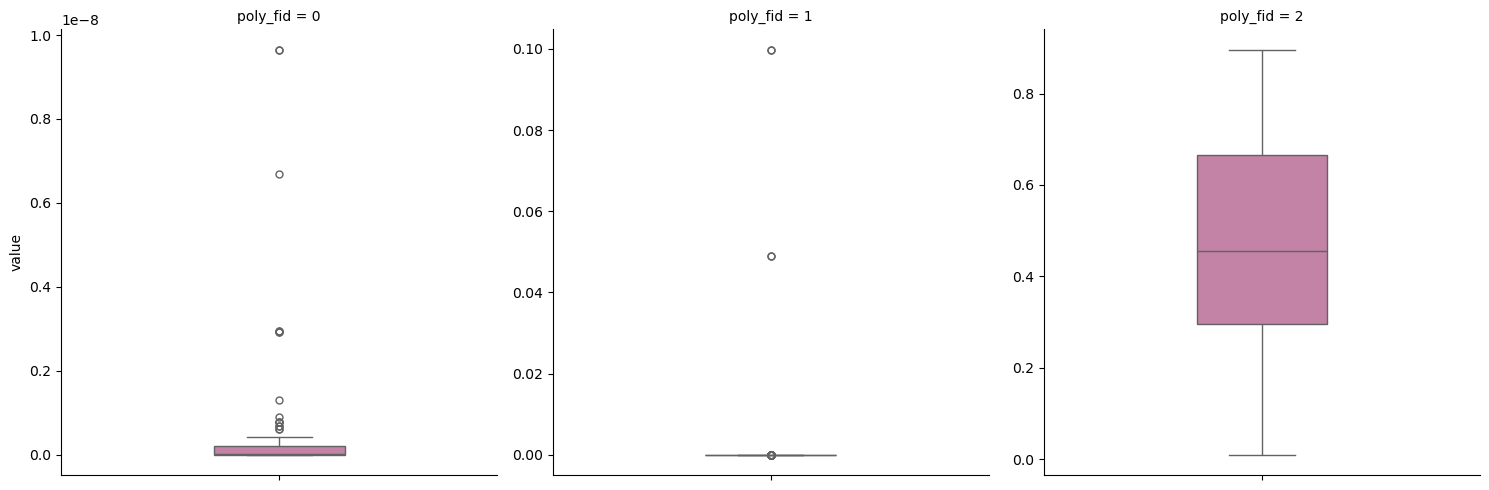

In [28]:
p_class_selected = sns.catplot(
    y='value', 
    col='poly_fid',  # This will create a separate plot for each unique value in the 'poly_fid' column
    data=ex_ras, 
    kind='box',
    col_wrap=3,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
    palette = {"#56B4E9", "#009E73", "#CC79A7"}
)
p_class_lst.set_titles(size = 18)
p_class_lst.set_xlabels("Date", fontsize = 18)
p_class_lst.set_ylabels("Canopy Water Content", fontsize = 18)

Great! Our extraction and plotting worked!

### Now let's extract data from more CWC dates

If you noticed at the beginning there were more than three CWC dates available when we printed `cwc_list`. **Let's add two more dates to our boxplots.**
* 02-19-2023 (this file will say merged because it is comprised of two EMIT scenes taken on the same day) 
* 10-14-2023


In [29]:
# the date and time codes strings we want to select from our larger cwc_list
# for the first one we are using the merged 0219 dataset
cwc_dates = ['20230219T202939_2305013_002_dangermond_cwc_merged',
             '20230401T203751', '20230629T170449', '20230923T232101',
             '20231014T224006']
#loop so that the files appear chronologically like our cwc_dates list
fil_cwc_list = [] # empty list
for date in cwc_dates:
    # filter for appropriate dates and then add back
    fil_cwc_list.extend([file for file in cwc_list if date in file])
fil_cwc_list

['../data/cwc/EMIT_L2A_RFL_001_20230219T202939_2305013_002_dangermond_cwc_merged.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230401T203751_2309114_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230629T170449_2318011_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20230923T232101_2326615_002_dangermond_cwc.tif',
 '../data/cwc/EMIT_L2A_RFL_001_20231014T224006_2328715_002_dangermond_cwc.tif']

### Let's visualize all five images before extracting the data

In [30]:
# Initialize an empty list to store the plots
plots = []

# Iterate over each CWC file and create a plot
for file in fil_cwc_list:
    # Open the raster file
    ras = rxr.open_rasterio(file).squeeze('band', drop=True)
    
    # extract the date string from the file name using string matching
    ras_date =  re.search(r"\d{8}", file).group()
    date_object = datetime.strptime(ras_date, "%Y%m%d")
    date_only = date_object.date()
    
    # Create a plot using geoviews
    plot = ras.hvplot.image(x='x', y='y', geo=True, cmap='blues',
                                                    tiles='ESRI', 
                                                    title=f"{date_only} {ras.long_name} ({ras.units})",
                                                    xlabel='Longitude', ylabel='Latitude',
                                                    frame_width=400, frame_height= 300,
                                                    fontscale=1, alpha=0.7)
    
    # Add the plot to the list
    plots.append(plot)

# Display all plots in a grid layout using Panel
grid = pn.GridSpec(sizing_mode='stretch_both')
for i, plot in enumerate(plots):
    grid[i // 2, i % 2] = plot  # Adjust 3 to change the number of columns

grid.servable()

GridSpec(ncols=2, nrows=3, sizing_mode='stretch_both')
    [0] HoloViews(Overlay, sizing_mode='stretch_both')
    [1] HoloViews(Overlay, sizing_mode='stretch_both')
    [2] HoloViews(Overlay, sizing_mode='stretch_both')
    [3] HoloViews(Overlay, sizing_mode='stretch_both')
    [4] HoloViews(Overlay, sizing_mode='stretch_both')

### Now let's extract the data for the polygons we drew! 

You should be pretty familiar with this loop by now. We did edit the line `ex_ras = extract_raster_values(ras, my_poly_gdf)`  to use our polygon geodataframe `my_poly_gdf` for raster extraction instead of `veg_poly`.

In [31]:
# create an empty list for the extracted values
ex_df = []
for r in fil_cwc_list:
    ## extract values
    ras = rxr.open_rasterio(r).squeeze('band',drop=True)
    
    ## here we replaced veg_poly with my_poly_gdf
    ex_ras = extract_raster_values(ras, my_poly_gdf)
    
    # add date to the dataframe
    date_object = datetime.strptime(ras.attrs['time_coverage_end'], "%Y-%m-%dT%H:%M:%S%z")
    date_only = date_object.date()
    
    # add column 
    ex_ras['rasDate'] = date_only
    # add back to data frame with all values
    ex_df.append(ex_ras)

ex_cwc_five = pd.concat(ex_df).reset_index(drop=True)

# change the name of the extracted data column
ex_cwc_five.rename(columns = {'value':'CWC'}, inplace = True)
# remove all nan values from the raster
ex_cwc_five = ex_cwc_five[ex_cwc_five['CWC'] != -9999 ] 

Print boxplots for all your extracted polygons. You should have 5 dates this time. 

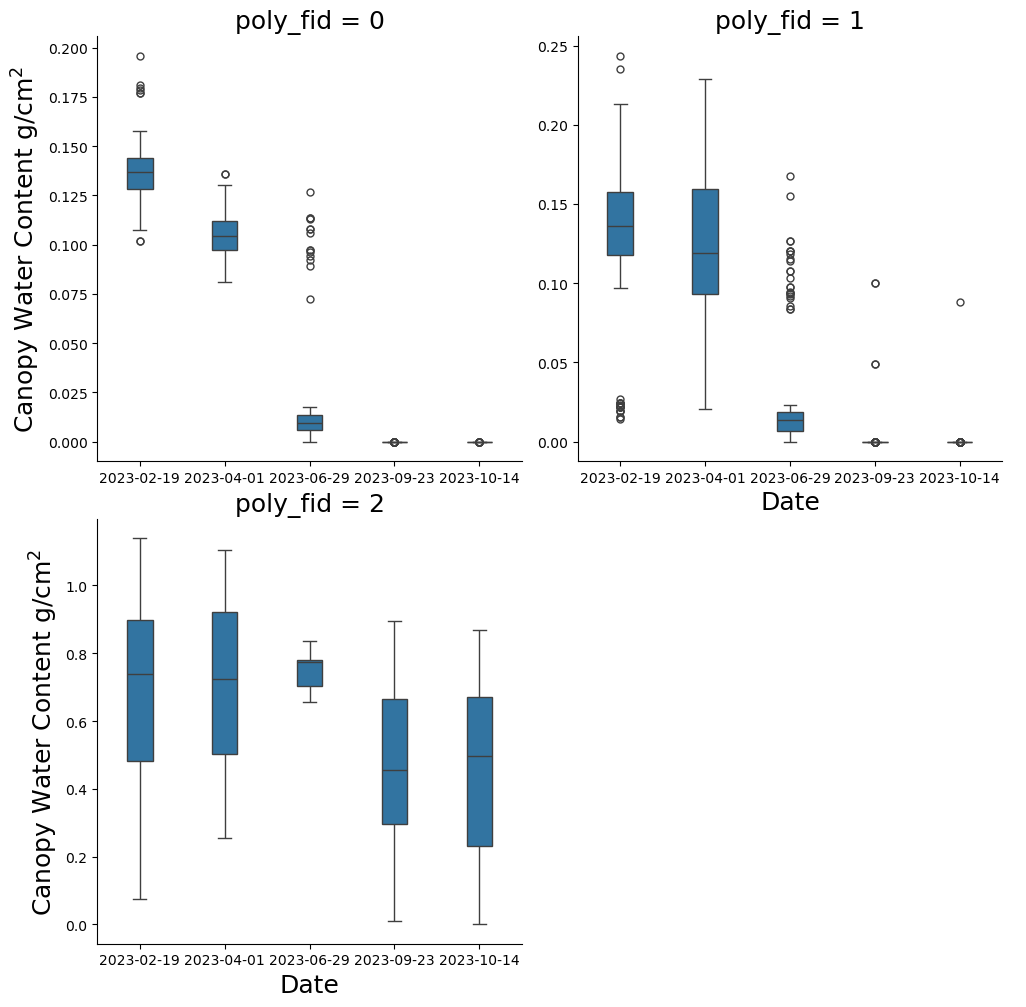

In [32]:
p_class_sel = sns.catplot(
    x='rasDate', 
    y='CWC', 
    col='poly_fid',  # This will create a separate plot for each unique value in the 'poly_fid' column
    data=ex_cwc_five, 
    kind='box',
    col_wrap=2,  # Adjust this depending on how many plots per row you want
    sharex=False, 
    sharey=False,
    height=5, 
    aspect=1,
    width = 0.3,
)

p_class_sel.set_titles(size = 18)
p_class_sel.set_xlabels("Date", fontsize = 18)
p_class_sel.set_ylabels("Canopy Water Content g/cm$\mathregular{^2}$", fontsize = 18)

<div class="alert alert-info"> 
    If you have time, see if you can repeat this process for additional LST dates.

